In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import random
from importlib import reload

# custom library
import useful_functions

In [2]:
# useful for when you need to reload your library without reloading the entire notebook
reload(useful_functions)

<module 'useful_functions' from 'c:\\Users\\angel\\OneDrive\\Desktop\\ECE 4850 - Machine Learning\\ECE-4850-Machine-Learning\\project3\\useful_functions.py'>

In [3]:
# the 'default' order of the alphabet
key = np.array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [4]:
# this block will input a block of known text, make it useful, and save a copy as a pickle file for later
known_text = useful_functions.convert_text_to_array('war_and_peace.txt')

with open('war_and_peace.pickle', 'wb') as file:
    pickle.dump(known_text, file)

In [5]:
# use this block of code if you already have a pickle file for a known text and don't want to reprocess it
with open('war_and_peace.pickle', 'rb') as file:
    known_text = pickle.load(file)

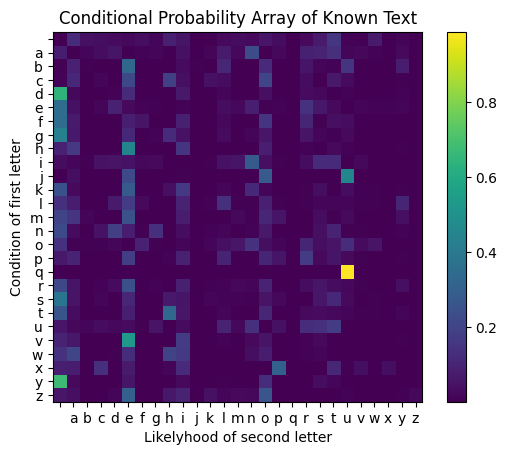

Highest probability in known probability array: 0.9881255301102629
Lowest probability in known probability array: 1.767793281324855e-06


In [6]:
known_prob_array = useful_functions.find_probability_array(known_text)

# this just prints the conditional probability array
keyrange = np.arange(key.size)
plt.imshow(known_prob_array)
plt.xticks(keyrange, key)
plt.yticks(keyrange, key)
plt.ylabel("Condition of first letter")
plt.xlabel("Likelyhood of second letter")
plt.title('Conditional Probability Array of Known Text')
plt.colorbar()
plt.show()

print(f'Highest probability in known probability array: {np.amax(known_prob_array)}')
print(f'Lowest probability in known probability array: {np.amin(known_prob_array)}')

In [7]:
# this block will input a block of unknown text, make it useful, and save a copy as a pickle file for later
unknown_text = useful_functions.convert_text_to_array('unknown_text.txt')

with open('unknown_text.pickle', 'wb') as file:
    pickle.dump(unknown_text, file)

In [8]:
# use this block of code if you already have a pickle file for an unknown text and don't want to reprocess it
with open('unknown_text.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

In [1]:
unknown_prob_array = useful_functions.find_probability_array(unknown_text)

# this just prints the conditional probability array
keyrange = np.arange(key.size)
plt.imshow(unknown_prob_array)
plt.xticks(keyrange, key)
plt.yticks(keyrange, key)
plt.ylabel('Condition of first letter')
plt.xlabel('Likelyhood of second letter')
plt.title('Conditional Probability Array of Encoded Text')
plt.colorbar()
plt.show()

print(f'Log likelyhood of default decoding scheme being correct: {useful_functions.calculate_likelyhood(unknown_text, known_prob_array)}')
print(f'Highest probability in unknown probability array: {np.amax(unknown_prob_array)}')
print(f'Lowest probability in unknown probability array: {np.amin(unknown_prob_array)}')

NameError: name 'useful_functions' is not defined

In [10]:
# these just create stuff needed for the process
old_working_key = copy.deepcopy(key)
best_key = copy.deepcopy(key)
new_text = copy.deepcopy(unknown_text)
old_prob_array = useful_functions.find_probability_array(new_text)
likelyhood_array = np.array([useful_functions.calculate_likelyhood(new_text, known_prob_array)])

In [11]:
T = 1
T_stop = 0.05
T_decimation = 0.99
T_counter = 0
T_loop_max = 50

while T > T_stop:
    # generate a new key by swapping a character
    working_key, swapped_chars = useful_functions.swap_char(old_working_key)
    # translate text and generate probability array with it
    # in reality, we just swap the two characters in the already translated text to avoid retranslating the text
    new_text = useful_functions.swap_text(new_text, swapped_chars)
    # calculate the new likelyhood
    likelyhood = useful_functions.calculate_likelyhood(new_text, known_prob_array)
    # if the likelyhood is more than the current likelyhood, continue working with it
    if likelyhood > likelyhood_array[-1]:
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        # check to see if this likelyhood is the GOAT
        if likelyhood >= np.max(likelyhood_array):
            print(f'Current Best Log Likelyhood: {likelyhood}')
            print('----------------------------------------------------------------------')
            print(''.join(new_text))
            print()
            best_key = copy.copy(working_key)
        old_working_key = copy.copy(working_key)
    # if the likelyhood is not more, perform our random chance moment
    # if we pass, continue working with it but do not assign it as best
    # the original algorithm did not have a simulated annealing value, but I added one because it seemed like the professor wanted it
    # I 'delogified' the likelyhood with this exponential
    # e^(log(a/b)) = e^(log(a) - log(b)), likelihoods already calculated in logs
    elif T*np.exp(likelyhood - likelyhood_array[-1]) > random.uniform(0, 1):
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        old_working_key = copy.copy(working_key)
    # this is just to swap the text back if we don't want to keep the change at all
    else:
        new_text = useful_functions.swap_text(new_text, swapped_chars)

    # here we check if it is time to cool down
    if T_counter >= T_loop_max:
        T_counter = 0
        T *= T_decimation
    else:
        T_counter += 1

Current Best Log Likelyhood: -13688.465888599249
----------------------------------------------------------------------
ubj dohwebsjlnbjhbaisilwdojdfjhwqoimhjnirwoqjijhwxambcjdohlsiwoljyihbejdojdyhbsrilwdohjdfjodwhzjeilijghwoqjijfgmmzjyizbhwiojsbhgmljijvdwoljebohwlzjfdsjlnbjiygoeiobhjlnbjhwxambcj dohlsiwobejhwqoimjwhjbhliymwhnbejldjhab wfwimmzjimmdujfdsjlnbjiygoeiobhjldjybjhaishbjlnwhjvdwoljebohwlzjwhjboedubejuwlnjijaisixblbsjunwnjwhjaisixblbswpbejldjbodgsiqbjhaishbobhhjgomwtbjsbmilbejasbrwdghjudstjunw njewejodljhab wfwimmzjwxadhbjlnbjhaishwlzjihhgxalwdojdrbsimmjijqwyyhjhixamwoqjfsixbudstjwhjbhliymwhnbejfsdxjunwnjimmjaisixblbshjiojybjmbisobejijxblsdadmwhjhixamwoqjfsixbudstjwhjebrbmdabejfdsjlnbjiygoeiobhjxwclgsbj dbffw wbolhjunw njbcamw wlmzjioejbffwwbolmzjsbasbhbolhjlnbjhaishbobhhjfdsjlnbjaisixblbsjdfjlnbjewswnmbljewhlswyglwdojqdrbsowoqjhaishbobhhjlnbjadhlbswdsjwhjhnduojldjybjmdhbmzjiaasdcwxilbejyzjijqixxijlnghjlnbjbolwsbjhbljdfjaisixblbshjiojybjbffw wbolmzjmbisobejyzjhixamwoqjubjdohwe

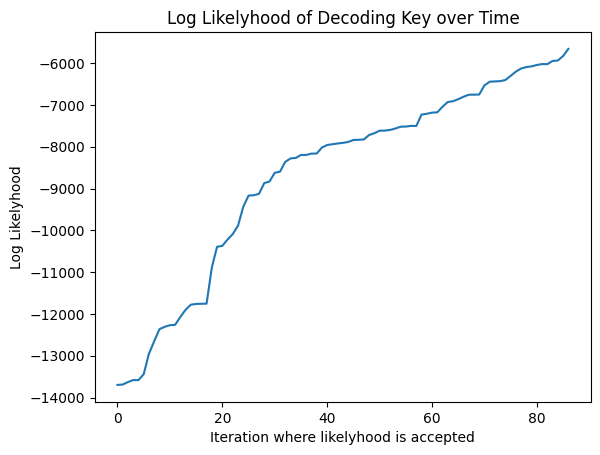

In [12]:
plt.plot(likelyhood_array)
plt.title('Log Likelyhood of Decoding Key over Time')
plt.xlabel('Iteration where likelyhood is accepted')
plt.ylabel('Log Likelyhood')
plt.show()

In [13]:
print('Best Decoding Key:')
print(best_key)
print()
print('Original Key:')
print(key)

Best Decoding Key:
['c' 'p' 'e' 'x' 'o' 'd' 'f' 'u' 's' 'a' ' ' 'q' 't' 'l' 'h' 'n' 'j' 'g'
 'v' 'r' 'k' 'w' 'z' 'i' 'm' 'b' 'y']

Original Key:
[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [14]:
with open('unknown_text.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

translated_text = useful_functions.translate_text(unknown_text, best_key)
print('Decoded Text:\n----------------------------------------------------------------------')
print(''.join(translated_text))

Decoded Text:
----------------------------------------------------------------------
we consider the separation of signals having a simplex onstraint based on observations of noisy data using a fully bayesian result a joint density for the abundanes the simplex constrained signal is established to specifially allow for the abundanes to be sparse this joint density is endowed with a parameter whih is parameterized to enourage sparseness unlike related previous work which did not specifially impose the sparsity assumption overall a gibbs sampling framework is established from whih all parameters an be learned a metropolis sampling framework is developed for the abundanes mixture coefficients which explicitly and effiiently represents the sparseness for the parameter of the dirihlet distribution governing sparseness the posterior is shown to be losely approximated by a gamma thus the entire set of parameters an be efficiently learned by sampling we onsider the signal model in whih both an

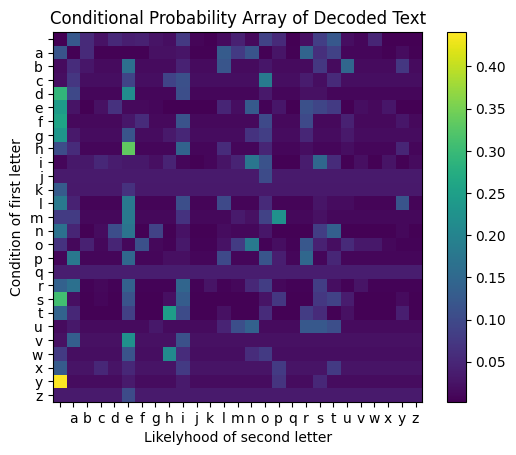

In [15]:
final_prob_array = useful_functions.find_probability_array(translated_text)

# this just prints the conditional probability array
plt.imshow(final_prob_array)
keyrange = np.arange(key.size)
plt.xticks(keyrange, key) 
plt.yticks(keyrange, key)
plt.ylabel('Condition of first letter')
plt.xlabel('Likelyhood of second letter')
plt.title('Conditional Probability Array of Decoded Text')
plt.colorbar()
plt.show()